**Information Visualization**<br>
HDFC BANK PAST 1 yr STOCK ANALYSIS

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

Read data from csv file and display first few rows


In [5]:
path="/content/HDFCBANK.NS.csv"
HDFC_df = pd.read_csv(path) 
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,1418.849976,1431.650024,1390.050049,1395.449951,1379.411499,22810188
1,2022-04-19,1380.900024,1389.550049,1327.000000,1342.199951,1326.773560,37048011
2,2022-04-20,1354.449951,1359.900024,1335.349976,1354.300049,1338.734497,24662868
3,2022-04-21,1365.000000,1379.800049,1353.300049,1374.349976,1358.554077,26223135
4,2022-04-22,1360.000000,1375.349976,1349.150024,1355.599976,1340.019531,10329574


Since our time-frame of analysis is large, we can relax on number of decimal places to consider.

In [6]:
HDFC_df = HDFC_df.round(2)
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,1418.85,1431.65,1390.05,1395.45,1379.41,22810188
1,2022-04-19,1380.90,1389.55,1327.00,1342.20,1326.77,37048011


lets determine the shape of the dataset

In [7]:
HDFC_df.shape

(249, 7)

In [8]:
HDFC_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Drop the null entries from the dataset

In [9]:
HDFC_df.dropna(inplace = True, axis = 0)

In [10]:
HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
HDFC_df['Date'] = pd.to_datetime(HDFC_df['Date'])
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,1418.85,1431.65,1390.05,1395.45,1379.41,22810188
1,2022-04-19,1380.90,1389.55,1327.00,1342.20,1326.77,37048011


In [14]:
HDFC_df['Date'].max() - HDFC_df['Date'].min()

Timedelta('365 days 00:00:00')

In [15]:
HDFC_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,1621,1635,1607,1621,1621,9270697
std,35,33,34,34,34,5146269
min,1539,1559,1532,1541,1541,2190689
25%,1596,1611,1585,1597,1597,5351099
50%,1620,1638,1607,1627,1627,7387932
75%,1648,1662,1634,1650,1650,13244111
max,1720,1720,1678,1695,1695,22318672


In [17]:
HDFC_df.index = HDFC_df['Date']

General variation in the stock price

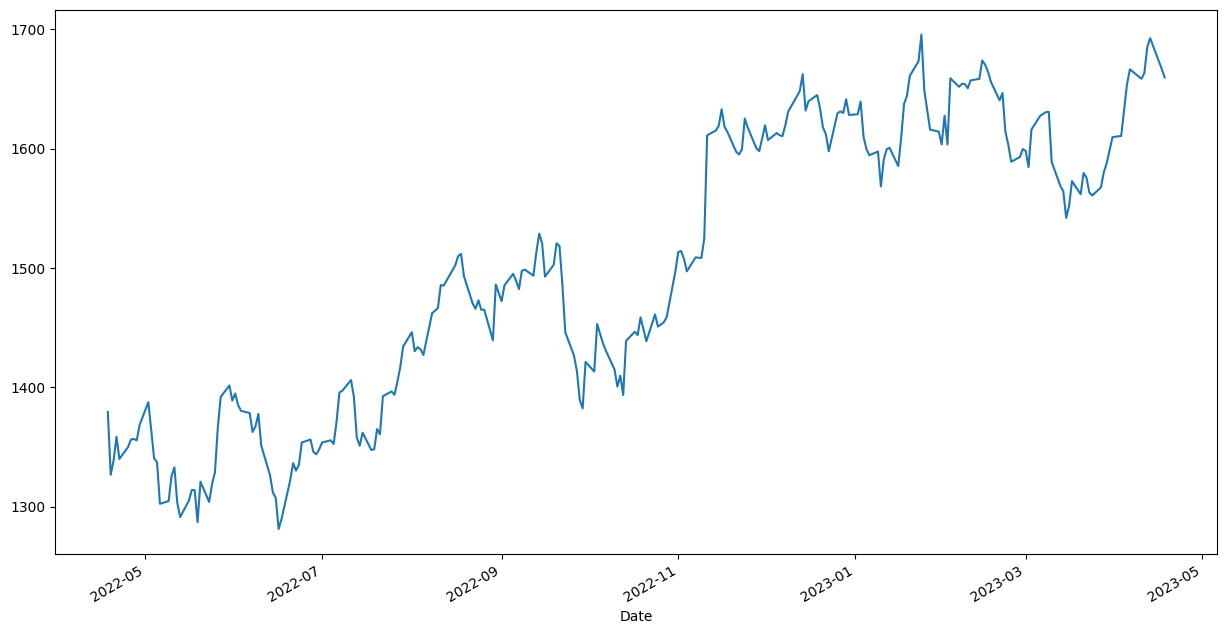

In [18]:
HDFC_df['Adj Close'].plot(figsize = (15,8))
plt.show()

Day-to-day percentage change(Daily returns)

In [19]:
HDFC_df['Day_Perc_Change'] = HDFC_df['Adj Close'].pct_change()*100
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2022-04-18,2022-04-18,1418.85,1431.65,1390.05,1395.45,1379.41,22810188,NaN
2022-04-19,2022-04-19,1380.90,1389.55,1327.00,1342.20,1326.77,37048011,-3.816124
2022-04-20,2022-04-20,1354.45,1359.90,1335.35,1354.30,1338.73,24662868,0.901437
2022-04-21,2022-04-21,1365.00,1379.80,1353.30,1374.35,1358.55,26223135,1.480508
2022-04-22,2022-04-22,1360.00,1375.35,1349.15,1355.60,1340.02,10329574,-1.363954


In [20]:
HDFC_df.dropna(axis = 0, inplace = True)

Representing daily returns in form of a plot

<Axes: xlabel='Date'>

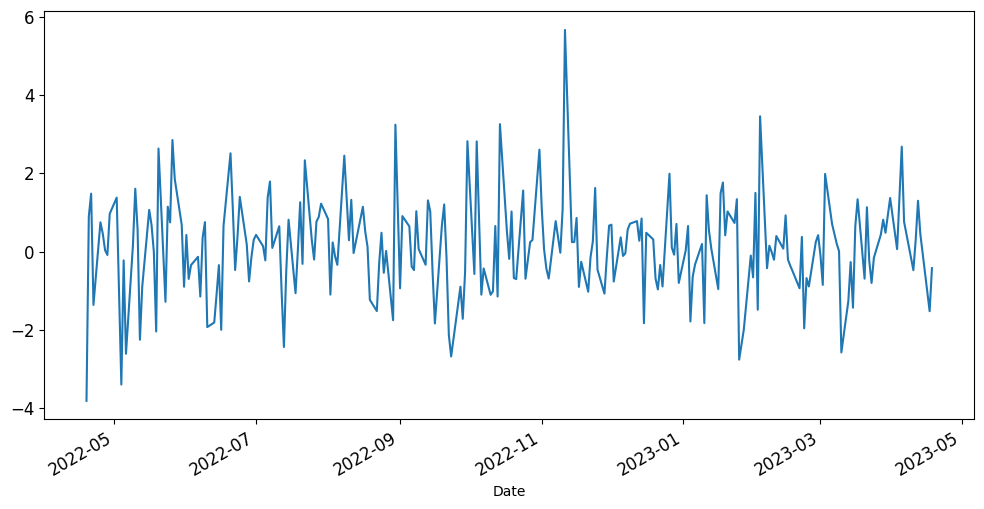

In [21]:
HDFC_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

Plotting daily returns distribution histogram

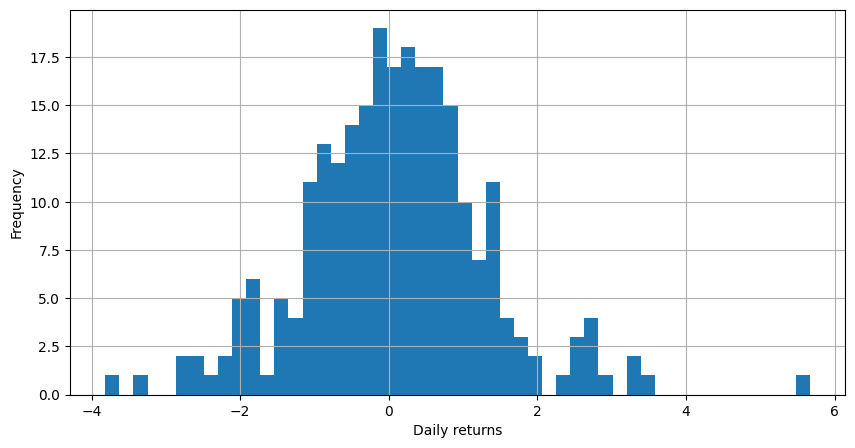

count    248.000000
mean       0.082271
std        1.243601
min       -3.816124
25%       -0.681231
50%        0.071103
75%        0.755417
max        5.666503
Name: Day_Perc_Change, dtype: float64

In [24]:
HDFC_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
HDFC_df.Day_Perc_Change.describe()

Trend Analysis

In [25]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
HDFC_df['Trend']= np.zeros(HDFC_df['Day_Perc_Change'].count())
HDFC_df['Trend']= HDFC_df['Day_Perc_Change'].apply(lambda x:trend(x))
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2022-04-19,2022-04-19,1380.90,1389.55,1327.00,1342.20,1326.77,37048011,-3.816124,Among top losers
2022-04-20,2022-04-20,1354.45,1359.90,1335.35,1354.30,1338.73,24662868,0.901437,Slight Positive
2022-04-21,2022-04-21,1365.00,1379.80,1353.30,1374.35,1358.55,26223135,1.480508,Positive
2022-04-22,2022-04-22,1360.00,1375.35,1349.15,1355.60,1340.02,10329574,-1.363954,Negative
2022-04-25,2022-04-25,1350.00,1370.65,1322.25,1365.75,1350.05,10467744,0.748496,Slight Positive


Visualizing Trend Frequency with Pie-Chart

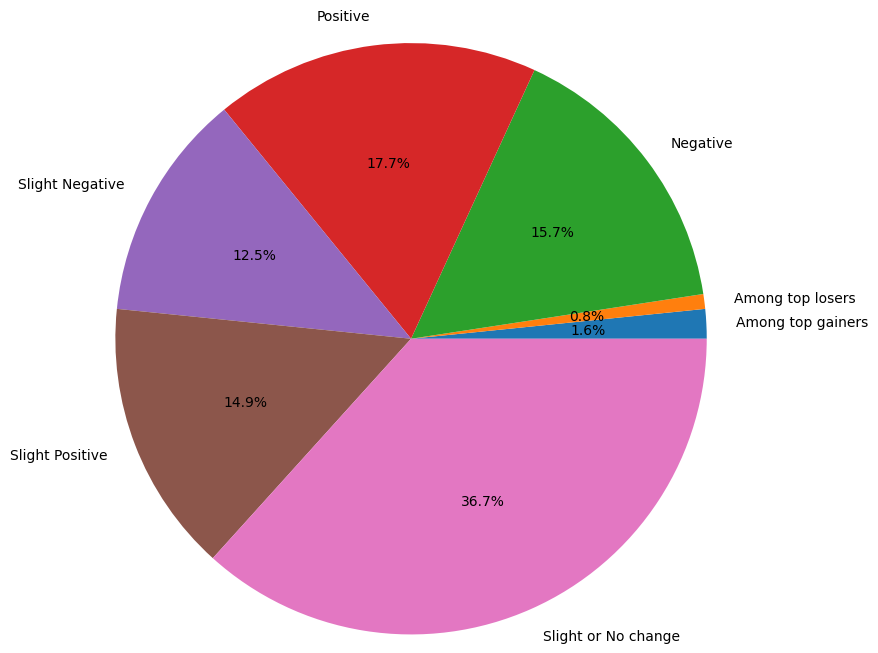

In [27]:
HDFC_pie_data = HDFC_df.groupby('Trend')
pie_label = sorted([i for i in HDFC_df.loc[:, 'Trend'].unique()])
plt.pie(HDFC_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

Daily Returns and Volume

<Axes: xlabel='Date'>

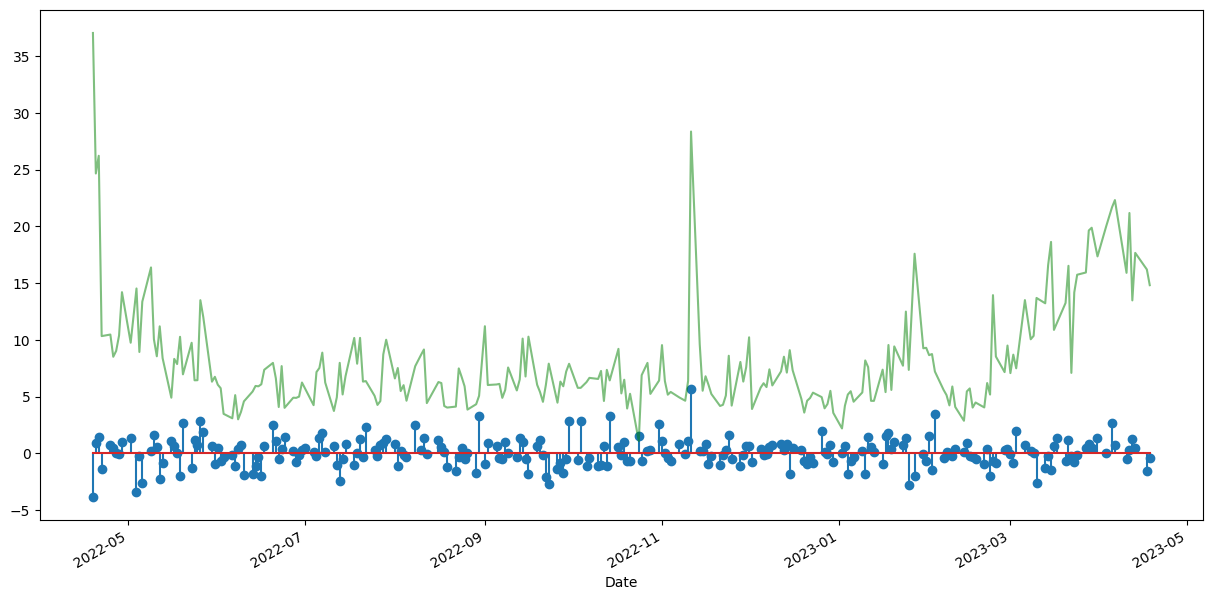

In [30]:
plt.stem(HDFC_df['Date'], HDFC_df['Day_Perc_Change'])
(HDFC_df['Volume']/1000000).plot(figsize = (15, 7.5), 
                                 color = 'green', 
                                 alpha = 0.5)